In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['figure.figsize'] = (12,8)

## Labling Time Series, Exporting Graphics - Money Market Data (zimoma)
### Use *snb-data-zimoma-en-all-20170502_1430.csv* to complete the following exercise:

In [4]:
data = pd.read_csv("data/snb-data-zimoma-en-all-20170502_1430.csv")

#### Add the following information to the time series plot of the 1TGT data:
- 1973-11: Oil Price Shock
- 1991-01 – 1993-12: Recession in Switzerland
- 2009-01 – 2009-12: Recession in Switzerland
- 2008-09: Lehman-Brothers collapse
- 2011-08: Introduction of CHF/EUR floor
- 2015-01: Removal of CHF/EUR floor

*Matplotlib hint: http://matplotlib.org/users/annotations.html*

In [5]:
def str_datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m')

In [6]:
# assign a new year column and datetime column, each based on Date column
data = data.assign(datetime=data.Date.apply(lambda x: str_datetime(x)),
                   year=data.Date.apply(lambda x: x.split('-')[0]))

In [7]:
data.head()

Date     D0  Value   datetime  year
0  1972-01  SARON    NaN 1972-01-01  1972
1  1972-01   1TGT    0.0 1972-01-01  1972
2  1972-01   EG3M    NaN 1972-01-01  1972
3  1972-01     1M    NaN 1972-01-01  1972
4  1972-01    3M0    NaN 1972-01-01  1972

In [8]:
def get_value_by_year(year):
    """ Use global 'data' dataframe """
    return data[data.year == str(year)].dropna().Value.mean()

In [37]:
def add_annotated_line(g, x, y, label=None, hjust=1, vjust=1):
      
    line = plt.vlines(x, *g.axes.get_ylim(), color='r')
    
    if label is not None:
        g.annotate(label, 
               xy=(x,y),
               xytext=(x+hjust, y+vjust),
               arrowprops=dict(arrowstyle='->'))
    
    return (g, line)

In [29]:
def get_year_ix(data_, year_):
    return data_.groupby('year').count().index.tolist().index(year_)

In [30]:
year_1973 = get_year_ix(data, '1973')
year_1991 = get_year_ix(data, '1991')
year_1993 = get_year_ix(data, '1993')

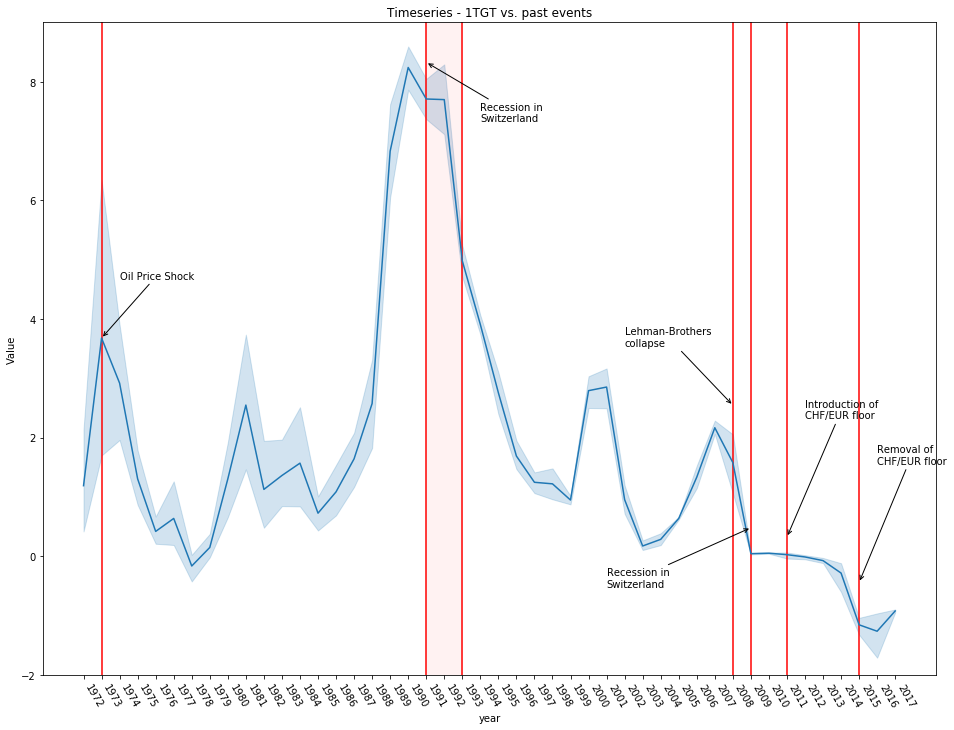

In [46]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(16)

g = sns.lineplot(x='year', y='Value', data=data[data.D0 == '1TGT'], ax=ax)

# 1973-11: Oil Price Shock
_ = add_annotated_line(g, year_1973, get_value_by_year('1973'),
                          label='Oil Price Shock')
          
# # 1991-01 - 1993-12: Recession in Switzerland
_ = add_annotated_line(g, year_1991, get_value_by_year('1991'),
                       label='Recession in\nSwitzerland',
                       hjust=3, vjust=-1)
_ = add_annotated_line(g, year_1993, get_value_by_year('1993'))

plt.fill_between([year_1991, year_1993], *g.axes.get_ylim(), color='r', alpha=0.05)

# # 2009-01 – 2009-12: Recession in Switzerland
_ = add_annotated_line(g, get_year_ix(data, '2009'), get_value_by_year('2009'), 
                       label='Recession in\nSwitzerland',
                       hjust=-8,
                       vjust=-1)

# # 2008-09: Lehman-Brothers collapse
_ = add_annotated_line(g, get_year_ix(data, '2008'), get_value_by_year('2008'),
                       label='Lehman-Brothers\ncollapse', 
                       hjust=-6)

# # 2011-08: Introduction of CHF/EUR floor

_ = add_annotated_line(g, get_year_ix(data, '2011'), get_value_by_year('2011'),
                       label="Introduction of\nCHF/EUR floor",
                       vjust=2)

# # 2015-01: Removal of CHF/EUR floor
_ = add_annotated_line(g, get_year_ix(data, '2015'), get_value_by_year('2015'),
                       label="Removal of\nCHF/EUR floor",
                       vjust=2)

plt.xticks(rotation=-60, horizontalalignment='left')
plt.title("Timeseries - 1TGT vs. past events")
plt.ylim((-2,9))
# plt.ylim((min(data.dropna().Value), max(data.dropna().Value)))

plt.savefig("images/timeseries_1TGT_events.png", transparent=True)
None

---

### Put together a PowerPoint (or equivalent) presentation explaining the effect of the events above on the money-market rates.

####  *Try with different typefaces, remember the grid when laying the result out.*

- Blank Time Series

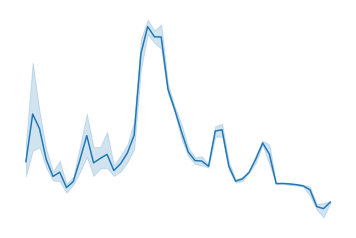

In [47]:
g = sns.lineplot(x='year', y='Value', data=data[data.D0 == '1TGT'])
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig("images/timeseries_blank.png", transparent=True, frameon=False)
None

- Time Series at Oil Price Shock

In [50]:
g = sns.lineplot(x='year', y='Value', data=data[(data.D0 == '1TGT') & (data.year < '1979')])
add_annotated_line(g, get_year_ix(data, '1973'), get_value_by_year('1973'), label="Oil Price Shock")
plt.title("Timeseries 1TGT and the Oil Price Shock of 1973")

sns.despine(ax=g, left=True, bottom=True)
plt.savefig("images/timeseries_oil.png", transparent=True, frameon=False)